In [6]:
using Pkg
if isfile("../Project.toml") && isfile("../Manifest.toml")
    Pkg.activate("..");
    ENV["PYTHON"] = "python3";
end

function printer(x::Any, verbose="")
    if verbose != ""
        println(verbose)
    end
    show(stdout, "text/plain", x)
    println("")
end

using Plots, Random, Distributions, LinearAlgebra, JuliaProbo
gr();

 Activating environment at `~/Programming/julia/notebook/JuliaProbo/Project.toml`


┌ Info: Saved animation to 
│   fn = /home/mamoru/Programming/julia/notebook/JuliaProbo/notebook/images/ch05_mcl04.gif
└ @ Plots /home/mamoru/.julia/packages/Plots/6EMd6/src/animation.jl:104


Plots.AnimatedGif("/home/mamoru/Programming/julia/notebook/JuliaProbo/notebook/images/ch05_mcl04.gif")
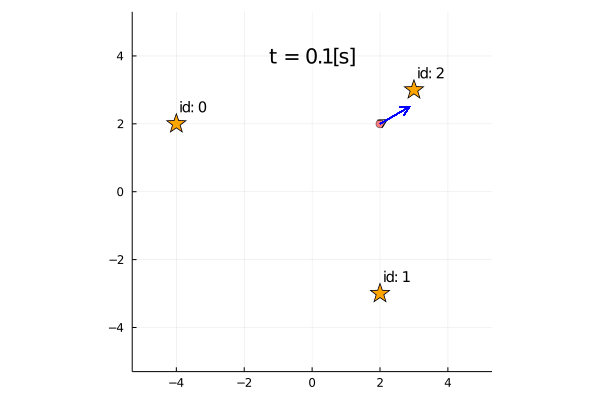

In [9]:
motion_noise_stds = Dict("vv" => 0.01, "vω" => 0.02, "ωv" => 0.03, "ωω" => 0.04)
function ch05_mcl05(motion_noise_stds)
    dt = 0.1
    # environment
    xlim = [-5.0, 5.0]
    ylim = [-5.0, 5.0]
    world = World(xlim, ylim)
    landmarks = [Landmark([-4.0, 2.0], 0), Landmark([2.0, -3.0], 1), Landmark([3.0, 3.0], 2)]
    m = Map()
    push!(m, landmarks)

    # robot side
    initial_pose = [2.0, 2.0, pi/6]
    estimator = Mcl(initial_pose, 100, motion_noise_stds)
    circling = EstimatorAgent(0.2, 10.0 / 180 * pi, dt, estimator)
    robot = RealRobot(initial_pose, circling, RealCamera(landmarks); color="red")
    push!(world, robot)
    push!(world, m)
    anim = @animate for i in 1:300
        t = dt * i
        annota = "t = $(round(t, sigdigits=3))[s]"
        p = draw(world, annota)
        z = observations(nothing, robot.pose_)
        v, ω = decision(circling, z)
        state_transition(robot, v, ω, dt; move_noise=true, vel_bias_noise=true)
    end
    gif(anim, "images/ch05_mcl04.gif", fps=10)
end
ch05_mcl05(motion_noise_stds)